In [17]:
#importing the libraries and model

from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#Loading the pre-train model

model = load_model('/content/drive/My Drive/photo project/mymodel-01.model')

#create the dictonay for labels and color

labels_dict={0:'good pose',1:'bad pose'}
color_dict={0:(0,255,0),1:(0,0,255)}


prediction =  [[0.33598843 0.66401154]]
bad pose: 66.40%


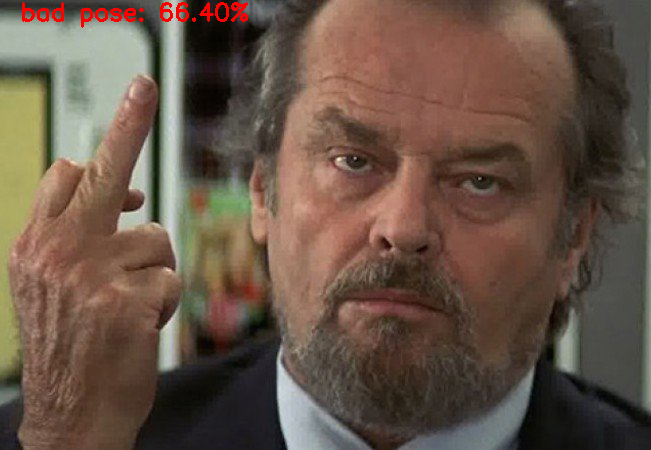

In [31]:
#reading the image
img=cv2.imread('/content/nicholson3.jpg')

#converting the image to grayscale
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#resize image 200x200 because we train the model with image size 200x200
resized=cv2.resize(gray,(200,200))

normalized=resized/255.0

#reshape the image
try:
  reshaped=np.reshape(normalized,(1,200,200,1))
except Exception as e:
  print("Exception")


#model prediction
result=model.predict(reshaped) 

print("\nprediction = ",result)

#the label contains the class which have highest probability. This will be our key.
label=np.argmax(result,axis=1)[0]

#used for formatting of text.
label1 = "{}: {:.2f}%".format(labels_dict[label],(np.max(result)) * 100)

print(label1)

#resize the image to display in our screen . This is optional
#img=cv2.resize(img,(0,0),fx=0.5,fy=0.5)

cv2.putText(img, label1, (20, 20),cv2.FONT_HERSHEY_SIMPLEX,0.8,color_dict[label],2)

cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()
